# Purpose of this Guide
Chronicling America is a website containing historic newspapers and the Library of Congress has created an API to allow for automated processes to interact with that data.

## What is Chronicling America’s API?

- a set of subroutine definitions, protocols, and tools for building software and applications...

Only kidding! It's some text on a screen. Go ahead, you can read it!

http://chroniclingamerica.loc.gov/lccn/sn85058396/1916-09-12/ed-1/seq-2.json
Not only can you read it, so can different programs and applications, making it a flexible and powerful tool for researching within Chronicling America. To use the Chronicling America API, you'll need a
- Willingness to try (and maybe mess up and try again)
- Curiosity
- Reading - closely and carefully

# What can you do with it?
There are a lot of possibillities! Look at some examples of what can be done with Chronicling America's API.
You can:
### Make stuff!
For example, researchers made an interactive map of the United States that allows visitors to visualize Chronicling America search results across space and time. 
### Discover stuff!
In 2016, challenge participants were asked "How can you use open data to explore history?" Members of the public were invited to craft web-based projects that demonstrated the potential for using the data found in Chronicling America. 

Learn more about these and other successful projects from this challenge at this blogpost on The Signal https://blogs.loc.gov/thesignal/2016/08/the-neh-chronicling-america-challenge-using-big-data-to-ask-big-questions/
# Let's Discover and Make
Ready to explore? Let's go!
Suppose you want to find out how many pages of newspapers we have for Arizona? You'll see that we ask for results by state, and specifically those from Arizona.
In the next block you just need to fill in the API URL. For example, put "http://chroniclingamerica.loc.gov/search/pages/results/?state=Arizona&format=json" in there. By looking at the JSON that is returned we can see that we are getting the first page of results, which includes 20 items.

In [21]:
import requests #import the library that we use to make the http request
r = requests.get("http://chroniclingamerica.loc.gov/search/pages/results/?state=Arizona&format=json").json()
r['itemsPerPage'] #print out the number of items per page:

20

### Exploring Results: Arizona
Let's see what the first result looks like - thanks to Chronicling America OCR, we can actually read the text from the newspaper page. Check it out! First, you'll ask for:

In [22]:
r['items'][0]['ocr_eng'] #no need to repeat the code from above since jupyter notebooks retains it

'TilU AIUZOXA JIU\'U1I1jICA: SUNDA.Y SlOIiMKU, JLTKK lO, 1\'JOO\nTHE ARIZONA REPUBLICAN\nPublished Every Day in the Year bj\nTHE\nArizona Publishing Co.\nGEO. W. VICKERS. Pres. and Cen. Mg.\nExclusive Morning Associated Press\nP\'spatches. . ,\nThe only Perfecting Prss In Arizona\nThe only battery of Linotypes In\nArizona.\nPublication office: 35-38 East Adams\nstreet. Telephone Main 47.\nEntered at the postoffiee at Phoenix,\nArizona, as mall matter of the second\nclass.\nSUBSCRIPTION RATES.\nBy mail, dally, one year WOO\nWeekly, one year 2.00\nCash in advance.\nBY CARRIER.\nDally, per month 73 cts\nUNlONfcQLrL\nPHOENIX. ARIZONA, JL\'XLO U. 1906.\nA BEGGING SENATORSHIP.\nThe rejection by that unambitious ag\nlku\'turist, the Hon. Dwtght Coburn. of\nthe appointment to the vacant Kansas\nsenatorship need not be attributed to\nhis utter disregard of pomp and pow\ner. Mr. Coburn is already in power,\nvast power, practically illimitab\'.e pow\ner. He is lord of the immeasurable\ncornfie\'d

In this case, we've said give us the OCR results in English for the 1st item.
Try it for yourself with the 5th item:
r['items][4]['ocr_eng']

## What else can we do? End or extend Debates
Let's say you're having a debate with your friends. They all think dogs were more widely covered in historical newspapers = they cite the media influence of Lassie and Underdog. But you think cats would clearly take up more column inches. Can you use the Chronicling America API to help resolve the debate?
You betcha!

This time, we're going to use some search terms. This approach is a bit different, because now the search is based on a relevancy ranking (unlike the previous one). Take a look at what this search looks like:
http://chroniclingamerica.loc.gov/search/pages/results/?proxtext=dogs

Remember, we're working with the JSON data. So, you'll add "&format=json" to the end of it to get the API version again:

In [23]:
dogs_search = requests.get('http://chroniclingamerica.loc.gov/search/pages/results/?proxtext=dogs&format=json').json()

To help us, we name the variable that the results are stored in with a shorthand. We're going to call it "dogs_search"
Now we can check in on the total number of "items" again. In this result, "items" are pages that contain the word dogs! So we say give us the total number of items from the results:

In [24]:
dogs_search['totalItems']

1830394

About 1.8 million results…hmmm. Well, that seems like quite a few pages of dogs... Let's look at one example. Remember, if we want the first result, we'll ask for "0":

In [25]:
dogs_search['items'][0]['url']

'http://chroniclingamerica.loc.gov/lccn/sn83045487/1913-04-21/ed-1/seq-20.json'

And we can look at the items themselves again: 'http://chroniclingamerica.loc.gov/lccn/sn83045487/1913-04-21/ed-1/seq-20.json'

Take a closer look at the OCR text:

In [26]:
requests.get('http://chroniclingamerica.loc.gov/lccn/sn83045487/1913-04-21/ed-1/seq-20/ocr.txt').text

'WOMEN LIKE DOGS BECAUSE DOGS, UNLIKE\nMEN, ADORE THEM ALWAYS BILLIE BURKE\nSome woman who evidently had been as unfortunate in her choice of\nmen and friends as she was unfortunate in her choice of a dogr made that\noft-iygeated speech: "Themore I see of men the-better Hike dogs."\nlake all smart\' epigrams, the intimation is hardly true, for there are\nsplendid men, as well as. fine dogs, in the world.\nThe normal woman .likes men as well as they like her, and that is a\ngood .deal. The. ;antagonism, between the sexes which?. wehear so much;\nabout f roinZtfre \' suffragets\'is\'-\'ali; toriuny\'fbt, j - " -"'

At any rate, there's some mounting evidence for the dog side of the debate. You still want to explore the frequency of cat mentions. But first, you decide to check in on a more complicated question like "which state likes dogs?" We will measure this by volume of mentions. You decide to take just the first twenty results for the search "dog" on Chronicling America (because it would take too long to do them all).

In [27]:
pages = requests.get("http://chroniclingamerica.loc.gov/search/pages/results/?proxtext=dog&rows=20&format=json").json()

Note that we added "%rows=20" to the previous query, which means "I only want 20 results per page". Most search engines (including this one) let us paginate the results and pick which page we want. Without picking one, we get the first one. So, this is really saying "give me the top 20 most relevant results". And again, we want the JSON.

Now we're going to loop over all the results and count them.

In [28]:
from collections import Counter

c = Counter()
for page in pages['items']:
    c[page['state'][0]] += 1
    
c.most_common()

[('California', 6),
 ('Kentucky', 5),
 ('District of Columbia', 3),
 ('New York', 2),
 ('Illinois', 2),
 ('Washington', 1),
 ('Minnesota', 1)]

So the first 20 results tell us that California was a fan of Fido... or at least has a significant number of dog mentions. Now that we have the doggie data, it's time to crunch some cats numbers. Let's take a look at the same process but with cats instead of dogs:

In [29]:
cats_search = requests.get("http://chroniclingamerica.loc.gov/search/pages/results/?proxtext=cat&rows=20&format=json").json()
cats_search['totalItems']

2486385

That is a lot of cats!
Just to be sure, let's take a quick look at the first result page:

In [30]:
cats_search['items'][0]['url']

'http://chroniclingamerica.loc.gov/lccn/sn85066387/1903-08-02/ed-1/seq-19.json'

You can't convince your pals on pure volume alone. So, why don't we explore the breakdown of coverage from state to state and cats vs dogs.

How will you prove the results? Let's get the first 20 pages, with 20 results for each page. That is a total of 400 individual pages, and count which states they come from. We will do this for both dogs and cats and then graph them:

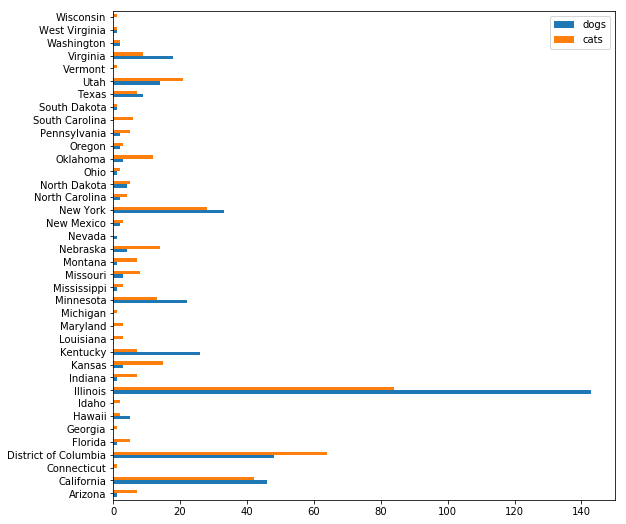

In [31]:
from collections import Counter
import pandas as pd
%matplotlib inline

pages_of_results = 20
dogs_count = Counter()
cats_count = Counter()

for page in range(0,pages_of_results):
    dogs_json = requests.get("http://chroniclingamerica.loc.gov/search/pages/results/?proxtext=dog&rows=20&format=json&page=" + str(page)).json()
    for item in dogs_json["items"]: 
        dogs_count[item["state"][0]] += 1

for page in range(0,pages_of_results):
    cats_json = requests.get("http://chroniclingamerica.loc.gov/search/pages/results/?proxtext=cat&rows=20&format=json&page=" + str(page)).json()
    for item in cats_json["items"]: 
        cats_count[item["state"][0]] += 1

        
dog_series = pd.Series(dogs_count)
cat_series = pd.Series(cats_count)

dog_vs_cat = pd.concat([dog_series, cat_series], axis=1, keys=["dogs", "cats"])
dog_vs_cat
dog_vs_cat.plot(kind='barh', figsize=(9,9))

Well by volume, cats are definitely winning but you'll want to do some closer inspection.
In the meantime, you can give your friends Illinois, Kentucky, Virginia, and New York as consolation!

# Further Research
Now you’re ready to tackle answers in other debates. Remember you can explore more from Chronicling America here: http://chroniclingamerica.loc.gov/about/
You can also Ask A Librarian: https://www.loc.gov/rr/askalib/